In [5]:
# import packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt

In [6]:
seed = 2724

### Import data

In [7]:
DF_PATH = "mod05_data/sample.csv"
df = pd.read_csv(DF_PATH)

### Separate data by independent (X) and dependent (y) variables

In [8]:
X = df[["income", "education_years", "zipcode_score"]]
y = df["target"]

### Split the data into a _training_ set (to build a model) and _test_ set (to validate a model)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

### Build a model on the training set

In [10]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=seed
)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=2724)

### Use SHAP to explain the model on test data

In [11]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

 99%|===================| 1490/1500 [01:15<00:00]        

This will allow us to see which variables are most important to predicting the outcome.

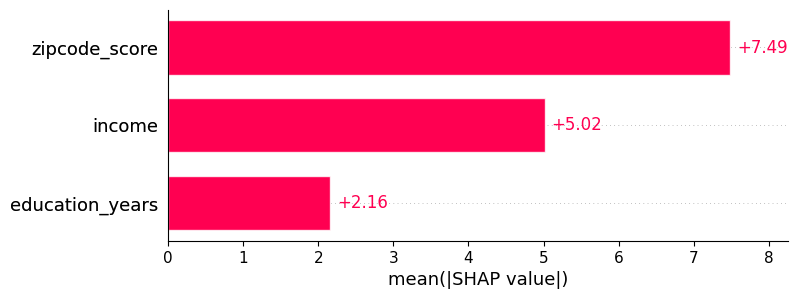

In [12]:
shap.plots.bar(shap_values)

### Import the `group` variable, which was **not** used in training this model.

In [13]:
X_test_with_group = X_test.copy()
X_test_with_group["group"] = df.loc[X_test.index, "group"]

### Look at the difference in SHAP values between the two groups across the variables used in the model.

In [14]:
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_df["group"] = X_test_with_group["group"].values

shap_df.groupby("group").mean()

,income,education_years,zipcode_score
group,,,
0,1.085462,-0.172202,5.865217
1,1.019984,-0.193786,-6.860764


### Let's put `group` and `zipcode_score` in the same plot

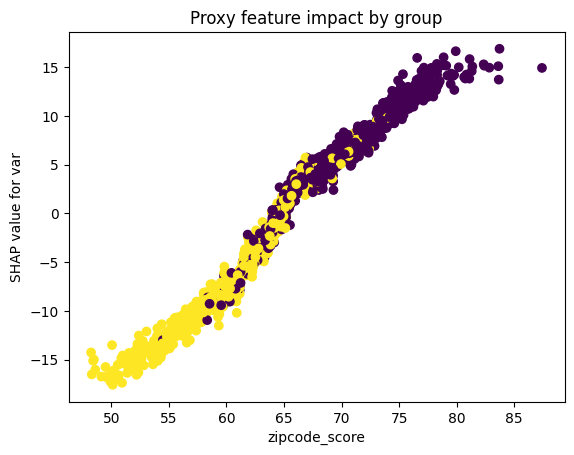

In [15]:
def plot_shap(var):
    # Extract SHAP values for the feature
    shap_var = shap_values[:, var].values

    # Plot the values of each group using different colors
    plt.figure()
    plt.scatter(
        X_test[var],
        shap_var,
        c=X_test_with_group["group"]
    )
    plt.xlabel(var)
    plt.ylabel(f"SHAP value for var")
    plt.title("Proxy feature impact by group")
    plt.show()

plot_shap("zipcode_score")

# Discussion Questions

### What is a _SHAP_ (or Shapley) value? 

A SHAP value represents how much a specific feature contributes to a single prediction compared to the model’s average prediction. A positive SHAP value means the feature pushes the prediction higher, while a negative value means it pushes the prediction lower.

### Suppose you built this model and then it is peer reviewed by another entity. If the reviewer asks whether you used the variable `group` in your model, what would your answer be?

No, the variable group was not used when training the model. The model was built using only income, education_years, and zipcode_score as features.

### If the reviewer asks whether the outcome of your model is correlated with `group`, what would your answer be?

Even though the model did not use the group variable, the outcome appears to be correlated with group. The SHAP visualizations show that certain features, such as zipcode_score (and possibly income

### Construct a "proxy feature impact by group" plot for `income`. How is this plot different from the one for `zipcode_score`?

In [16]:
plot_shap("income")

SyntaxError: invalid syntax (3608324597.py, line 1)

Type your answer here.

### If, instead, you were the **reviewer**, what other questions might you ask the person who built this model? Give at least two.

I would ask whether the model’s performance metrics differ across groups, such as whether prediction errors are systematically higher for one group. I would also ask whether removing or modifying potential proxy variables changes the fairness of the model.